In [1]:
### A Pluto.jl notebook ###
# v0.20.3
#> [frontmatter]
#> title = "Cauchy Theorem"
#> date = "2025-01-09"
#> tags = ["Complex", "analysis", "cauchy", "julia"]
#> description = "Complex Analysic notes"
#> 
#>     [[frontmatter.author]]
#>     name = "Nima Poshitban"
using Markdown
using InteractiveUtils


In [2]:
begin
	using PlutoExtras
    import Pkg
    # careful: this is _not_ a reproducible environment
    # activate the global environment
    Pkg.activate()
    import GLMakie
	using LaTeXStrings
end


  Activating project at `C:\Users\nima\.julia\environments\v1.11`


In [3]:
initialize_eqref()


<link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/katex@0.16.8/dist/katex.min.css" integrity="sha384-GvrOXuhMATgEsSwCs4smul74iXGOixntILdUW9XmUC6+HX0sLNAK3q71HotJqlAn" crossorigin="anonymous">

<style>
a.eq_href {
	text-decoration: none;
}
</style>

<script src="https://cdn.jsdelivr.net/npm/katex@0.16.8/dist/katex.min.js" integrity="sha384-cpW21h6RZv/phavutF+AuVYrr+dA8xD9zs6FwLpaCct6O9ctzYFfFr4dgmgccOTx" crossorigin="anonymous"></script>

<script id="katex-eqnum-script">


const a_vec = [] // This will hold the list of a tags with custom click, used for cleaning listeners up upon invalidation

const eqrefClick = (e) => {
	e.preventDefault() // This prevent normal scrolling to link
	const a = e.target
	const eq_id = a.getAttribute('eq_id')
	const eq = document.getElementById(eq_id)
	history.pushState({},'') // This is to allow going back to the previous position in the page after scroll with History Back
	eq.scrollIntoView({
		behavior: 'smooth',
		block: 'center',
	})
}

// We make a function to compute the vertical offset (from the top) of an object to the
// closest parent containing the katex-html class. This is used to find the equation number
// that is closest to the label
const findOffsetTop = obj => {
	let offset = 0
	let keepGoing = true
	while (keepGoing) {
		offset += obj.offsetTop
		// Check if the current offsetParent is the containing katex-html
		if (obj.offsetParent.classList.contains('katex-html')) {
			keepGoing = false
		} else {
			obj = obj.offsetParent
		}
	}
	return offset
}


// The katex equation numbers are wrapped in spans containing the class 'eqn-num'. WHen you
// assign a label, another class ('enclosing') is assigned to some parts of the rendered
// html containing the equation line. This means that equation containing labels will have
// both 'eqn-num' and 'enclosing'. The new approach is to go through all the katex math
// equations one by one and analyze how many numbered lines they contain by counting the
// 'eqn-num' instances. 
const updateCallback = () => {
a_vec.splice(0,a_vec.length) // Reset the array
const katex_blocks = document.querySelectorAll('.katex-html') // This selects all the environments we created with texeq
let i = 0;
for (let blk of katex_blocks) {
	// Find the number of numbered equation in each sub-block
	let numeqs = blk.querySelectorAll('.eqn-num')
	let eqlen = numeqs.length
	if (eqlen == 0) {
		continue // There is nothing to do here since no equation is numbered
	}
	let labeleqs = blk.querySelectorAll('.enclosing')
	if (labeleqs.length == 0) {
		// There is no label, so we just have to increase the counter
		i += eqlen
		continue
	}
	// Find the offset from the katex-html parent of each equation number, the assumption
	// here is that the span containing the label tag has the same (or almost the same) offset as the related equation number
	let eqoffsets = Array.from(numeqs,findOffsetTop)


	for (let item of labeleqs) {
		const labelOffset = findOffsetTop(item)
		let prevDiff = -Infinity
		let currentOffset = eqoffsets.shift()
		let currentDiff = currentOffset - labelOffset
		i += 1
		while (eqoffsets.length > 0 && currentDiff < 0) { // if currentOffset >= 0, it means that the current equ-num is lower than the label (or at the same height)
			prevDiff = currentDiff
			currentOffset = eqoffsets.shift()
			currentDiff = currentOffset - labelOffset
			i += 1
		}
		// Now we have to check whether the previous number with offset < 0 or the first with offset > 0 is the closest to the label offset
		if (Math.abs(currentDiff) > Math.abs(prevDiff)) {
			// The previous entry was closer, so we reduce i by one and put back the last shifted element in the offset array
			i -= 1
			eqoffsets.unshift(currentOffset)
		}
		// We now update all the links that refer to this label
		const id = item.id
		const a_vals = document.querySelectorAll(`[eq_id=${id}]`)
		a_vals !== null && a_vals.forEach(a => {
			a_vec.push(a) // Add this to the vector
			a.innerText = `(${i})`
			a.addE


# Cauchy Theorem




## Cauchy Integral Formulas

**C** is a toy contour

**Toy contour**: any closed curve where the notion of the interior is obvious

$$\large f(\mathcal{z})\,=\,\frac{1}{2\pi i} \oint_{\mathcal{C}}{\dfrac{f(\zeta)}{\zeta\,-\mathcal{z}}d\varsigma}$$




# Cauchy integral formula for the *nth* derivative of $f(z)$


$\large f^{(n)}(\mathcal{z})\,=\,\frac{n!}{2\pi i}\oint_{\mathcal{C}}{\dfrac{f(\zeta)}{(\zeta\,-\mathcal{z})^{n+1}}d\zeta}$
for all $z\,$ in the interior of $C$




## Poisson Integral
$\large u(r,\theta)\,=\frac{1}{2\pi}\int_{0}^{2\pi}{P_{r}(\theta-\varphi)u(1,\varphi)d\varphi}$




## Cauchy inequalities
$f\longrightarrow holomorphic$ in an open set $\Omega$ 


disk $D$ centered at $z_{0}$ and has a radius of $R$

then: 

$\left|f^{(n)}(z_{0}) \right| \, \le \, \dfrac{n!\left\|f\right\|_{\mathcal{C}}}{R^{n}}$

where $\left\|f\right|_{\mathcal{C}}\,=\,\underset{z\in \mathcal{C}}{sup}|f(\mathcal{z})|$ denotes the supremum of $|f|$ on the boundary cirlce $\mathcal{C}$




## Power Series Expansion

if $f \longrightarrow holomorphic$ in an open set $\Omega$

and disk $D$ centered at $z_{0}$ where closure is contained in $\Omega$

$\implies f\quad$ has a power series expansion at $z_{0}$

$f(\mathcal{z})\,=\,\sum_{n=0}^{\infty}{a_{n}(z-z_{0})^{n}}$ for all $\mathcal{z} \in D$

and the **coefficients** are given by:

$\large a_{n}\,=\,\dfrac{f^{(n)}(z_{0})}{n!}$

$$\Large \implies f(z)\,=\,\sum_{n=0}^{\infty}{\left(\frac{1}{2\pi i}\oint_{\mathcal{C}}{\dfrac{f(\zeta)}{(\zeta-z_{0})^{n+1}}d\zeta}\right)\cdot(z-z_{0})^{n}}$$





**Example of Cauchy Integral**




In [4]:
C = range(0,2π,360)


0.0:0.01750190893364787:6.283185307179586

In [5]:
fvarsigma = t -> exp(1).^(im.*t)


#1 (generic function with 1 method)

In [6]:
# Evaluate the contour
contour = fvarsigma.(C)


360-element Vector{ComplexF64}:
                1.0 + 0.0im
 0.9998468455013823 + 0.017501015425828787im
 0.9993874289181298 + 0.034996670133171884im
 0.9986218909736757 + 0.052481605045579915im
 0.9975504661591799 + 0.0699504643701731im
 0.9961734826617031 + 0.08739789723816892im
 0.9944913622636795 + 0.10481855934390122im
 0.9925046202137215 + 0.1222071145818292im
 0.9902138650687943 + 0.13955823668103456im
  0.987619798507809 + 0.15686661083670625im
 0.9847232151166929 + 0.17412693533811274im
 0.9815250021449998 + 0.19133392319256415im
 0.9780261392341382 + 0.20848230374486532im
                    ⋮
 0.9815250021449997 - 0.19133392319256481im
 0.9847232151166929 - 0.17412693533811274im
  0.987619798507809 - 0.15686661083670642im
 0.9902138650687943 - 0.13955823668103498im
 0.9925046202137214 - 0.1222071145818298im
 0.9944913622636795 - 0.10481855934390114im
  0.996173482661703 - 0.08739789723816904im
 0.9975504661591799 - 0.06995046437017344im
 0.9986218909736756 - 0.05248160504558

In [7]:
begin
f = GLMakie.Figure()
ax = GLMakie.Axis(f[1, 1], xlabel = "Re(z)", ylabel = "Im(z)", title = L""" e^{z}\quad \text{is entire}""")
GLMakie.lines!(ax,C,imag(contour), color=:red,label=L"""Im(e^{z})""")
GLMakie.lines!(ax,C,real(contour),color=:blue,label=L"""Re(e^{z})""")
GLMakie.lines!(ax, real(contour), imag(contour), zeros(length(C)), color=:green, label="A Toy Contour", linewidth=4)
GLMakie.axislegend(ax)
end


Makie.Legend()

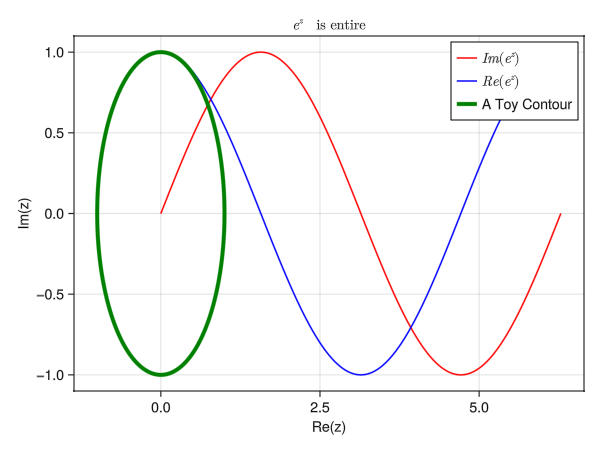

In [8]:
f



## Liouville's theorem

- if $f$ is **entire** and **bounded** then the $f$ is constant:

$$\left|f^{'}(z_0)\right|\,\le \frac{B}{R} \text{where}\,\, B\,\,\text{is bounded},\,\,R>0\,\,\text{letting}\,\,R\to\infty$$

Every **non-constant** polynominal $P(z)\,=\,a_{n}z^{n}+\cdots+a_{0}\,$ with complex coefficient has a **root** in $\mathbb{C}$

Every polynominal $P(z)\,=\,a_{n}z^{n}+\cdots+a_{0}\,$ of degree $n\ge1$ has precisely $n$ roots in $\mathbb{C}\,$ if the roots denoted by $w_{1},\cdots w_{n}$ then $P$ can be factored as:


$$P(z)\,=\,c(z-w_{1})(z-w_{2})\cdots (z-w_{n})\,\, \text{for some}\, c \in \mathbb{C},\,\,c=a_{n}$$





### Extra notes

If $f$ is **holomorphic** in a **region** $\Omega$ that vanishes on a sequence of distinct points with a limit point in $\Omega\,$ $\implies f$ is identically 0

given two holomorphic functions $f,g$ in a region $\Omega$ and $f(z)\,=\,g(z)$ for all $z$ in **some non-empty** subset of $\,\Omega\,\implies$  $f(z)=g(z)$

suppose given two functions $f$ and $F$ analytic in region $\,\Omega\,$ and $\,\Omega^{\prime}\,$ with $\,\Omega\,\subset\Omega^{\prime}\,\,$ if $f$ and $F$ agree on the smaller set $\Omega\,$,then $F$ is analytic continuation of $f$ into the region $\Omega^{\prime}$.

Then there can be **only one** such analytic continuation since $F$ is **uniquely determined** by $f$




## Morera's Theorem:

If $f$ is a continuous complex function on an open set $\Omega$ in the complex plane, and if for every closed curve $T$ in  $\Omega\,$ then 

$$\oint_{T}{f_{n}(z)\,dz\,=\,0}$$

If $\left\{f_{n}\right\}_{n=1}^{\infty}$ is a sequence of **holomorphic** functions that converges uniformely to a function $f$ in every compact subset of $\Omega$ then $f$ is **holomorphic** in $\Omega$

$$\oint_{T}{f_{n}(z)\,dz\,=\,0}\quad\text{for all}\,\,n \implies \oint_{T}{f(z)\,dz}$$




### Extra notes

given $\delta>0$, let $\Omega_{\delta}$ denote the subset of $\Omega$ defined by:

$$\Omega_{\delta}\,=\left\{\,z\in\Omega\,\,:\,\,\overline{D_{\delta}}(z) \subset \Omega\right\}$$

$$\implies \large{\underset{z \in \Omega}{sup}} \left|F^{\prime}(z)\right|\le \frac{1}{\delta}\,\large{\underset{\zeta \in \Omega}{sup}} \left|F(\zeta)\right|$$

whenever $F$ is holomorphic in $\,\Omega\,$ then $\,F=f_{n}-f$ 

This info helps to construct holomorphic functions as a series:

$$F(z)\,=\sum_{n=1}^{\infty}{f_{n}(z)}$$




## Holomorphic functions defined in terms of integrals

$$f(z)\,=\int_{b}^{a}{F(z,s)ds}$$

where $F$ is **holomorphic** in the **first argument $z$** and is **continues in the second argument $s$** 




## Symmetry principle

if $I$ denotes the interior part of the boundry $\Omega^{+}\,$and$\,\Omega^{-}$ then

$$\Omega^{+}\,\cup\,I\,\cup\,\Omega^{-}\,=\Omega$$

if $f^{+}$ and $f^{-}$ are holomorphic functions in $\Omega^{+}$ and $\Omega^{-}$ respectively that extend continuously to $I$ and

$$f^{+}(x)\,=f^{-}(x)\quad\text{for all}\,\, x\in I$$


 $f$ is defined on $\Omega$ by:

$$f(z)\,=\,\left\{ \begin{array}{cl}f^{+}(z)&: z \in \Omega^{+} \\
f^{+}(z)=f^{-}(z)&:\,\,z\in I \\ 
f^{-}(z)&: z\in\Omega^{-}\end{array}\right.$$

Then $f$ is holomorphic on all of the $\Omega$




## Shwartz reflection principle

if $f$ is a **holomorphic** function in $\Omega^{+}$ that extends continuously to $I$ such that $f$ is real-valued on $I\,\,$, then there exists a function $F$ **holomorphic** in all of $\Omega$ such that $F\,f\,$ on $\Omega^{+}$

$$F(z)=\sum \overline{a_{n}}(z-z_{0})^{n},\,\,\,\,\overline{f(x)}=f(x)\,\,\text{whenever}\,\, x\in I$$




### Extra notes

**singularity** : points where the function is not holomorphic and are "poles"

any function holomorphic in a neighborhood of compact set $K$ can be approximated uniformly on $K$ by rational functions whose **singularities** are in $K^{c}$

If $K^{c}$ is connected, any function holomorphic on a neighborhood of $K$ can be approximated uniformely on $K$ by polynominals.

Suppose $f$ is holomorphic on $\Omega$ and $K\subset \Omega$ is compact, then there exists finitely many segments $\gamma_{1}\cdots\gamma_{n}\,$ in $\Omega-K$ such that

$$f(z)=\sum_{n=1}^{N}{\frac{1}{2\pi i}} \oint_{\gamma_{n}}{\frac{f(\zeta)}{\zeta-z}d\zeta}\quad\text{for all}\,\,z\in K$$

for any line segment $\gamma$ entirely contained in $\Omega-K\,$, there exists a sequence of rational functions with singularities on $\gamma$ that approximate the integral $\oint_{\gamma}{\frac{f(\zeta)}{(\zeta-z)}d\zeta}$ uniformly on $K$, if $K^{c}$ is connected and $z_{0}\not\in K$ then the function

$$\dfrac{1}{z-z_{0}}$$

can be approximated uniformly on $K$ by polynominals



